In [67]:
# Imports

import numpy as np
import scipy
import matplotlib.pyplot as plt
import utils

%matplotlib tk
# %matplotlib inline

In [55]:
# Top hat + triangle with padding

sampling_freq : int = 1
sound1 : np.ndarray = np.concat(([0]*100, [1]*100, [0]*100)) # top hat
sound2 : np.ndarray = np.concat(([0]*100, np.arange(1, 101)/100, [0]*100)) # triangle

In [56]:
# Top hat + triangle withOUT padding

sampling_freq : int = 1
sound1 : np.ndarray = np.ones(100) # top hat
sound2 : np.ndarray = np.arange(1, 101)/100 # triangle

In [57]:
# Load audio files

sampling_freq, sound1 = scipy.io.wavfile.read("audio/Piano C2.wav")
sampling_freq, sound2 = scipy.io.wavfile.read("audio/Piano C2 - 2.wav")

In [58]:
# Load audio files

sampling_freq, sound1 = utils.load_sound_mono("samples/D5.wav")
sampling_freq, sound2 = utils.load_sound_mono("samples/D6.wav")

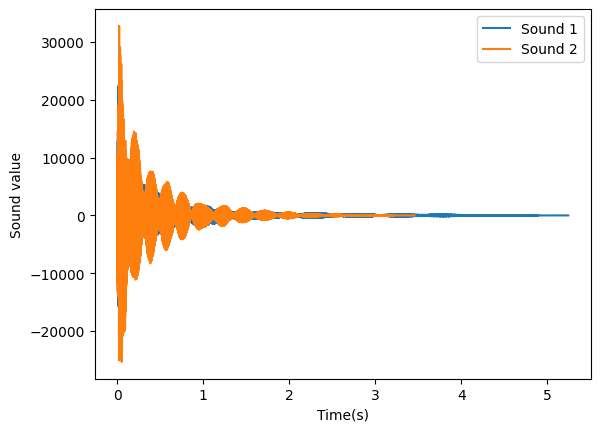

In [59]:
# Plot sounds

utils.plot_sounds(sound1, sound2, sampling_freq=sampling_freq)

In [102]:
# Compute spectrograms for sounds

time_resolution : float = .01 # seconds
sample_resolution : int = int(time_resolution * sampling_freq)

freq_resolution : float = 2
freq_bins : float = sampling_freq / freq_resolution / 2
nperseg : int = int(2 ** (np.round(np.log2(freq_bins)) + 1)) # Find nearest power of 2 and multiply by 2
noverlap : int = nperseg - sample_resolution

f1, t1, Sxx1 = scipy.signal.spectrogram(sound1, nperseg=nperseg, noverlap=noverlap, fs=sampling_freq)
f2, t2, Sxx2 = scipy.signal.spectrogram(sound2, nperseg=nperseg, noverlap=noverlap, fs=sampling_freq)

In [101]:
# Draw spectrograms

plt.figure()
plt.pcolormesh(t1, f1, 10*np.log10(Sxx1))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

plt.figure()
plt.pcolormesh(t2, f2, 10*np.log10(Sxx2))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [62]:
# Compute cross correlation

# Zero pad the spectrograms
Sxx1_padded = np.pad(Sxx1, pad_width=((0,0), (0, Sxx2.shape[1] - 1)))
Sxx2_padded = np.pad(Sxx2, pad_width=((0,0), (0, Sxx1.shape[1] - 1)))

# Take FFTs
fft1 = scipy.fft.rfft(Sxx1_padded, axis=1)
fft2 = scipy.fft.rfft(Sxx2_padded, axis=1)

# Multiply together in frequency domain
fft_product = np.multiply(fft1, np.conjugate(fft2))

# Take IFFT
cross_correlation_spectrum = scipy.fft.irfft(fft_product, axis=1)

# Flatten vertically
cross_correlation = np.sum(cross_correlation_spectrum, axis=0)

# Get scale factor
spectrogram_sampling_freq = sampling_freq / (sound1.shape[0] + sound2.shape[0] - 1) * (Sxx1.shape[1] + Sxx2.shape[1] - 1)

C:\Users\dapee\AppData\Local\Temp\ipykernel_9496\3010161948.py:4: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(10*np.log10(cross_correlation_spectrum))


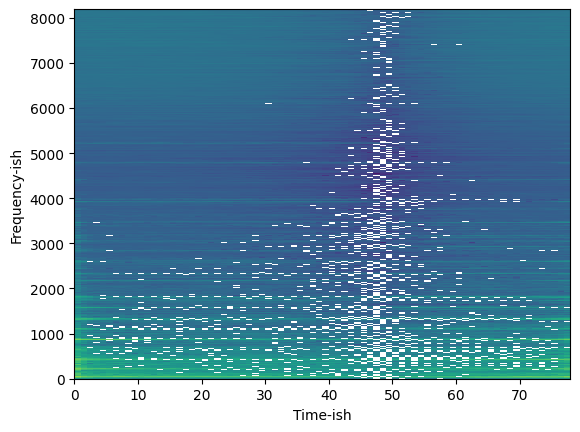

In [63]:
# Plot spectrogram of cross correlation

plt.figure()
plt.pcolormesh(10*np.log10(cross_correlation_spectrum))
plt.ylabel('Frequency-ish')
plt.xlabel('Time-ish')
plt.show()

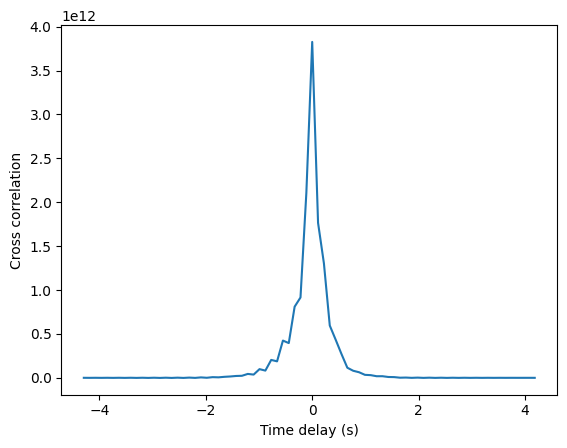

In [64]:
# Plot cross correlation

time_window = cross_correlation.shape[0] / spectrogram_sampling_freq

cross_correlation_shifted : np.ndarray = np.concat((cross_correlation[cross_correlation.shape[0]//2:], cross_correlation[:cross_correlation.shape[0]//2]))

plt.figure()
plt.plot(np.arange(-time_window/2, time_window/2, 1/spectrogram_sampling_freq), cross_correlation_shifted)
plt.xlabel("Time delay (s)")
plt.ylabel("Cross correlation")
plt.show()

In [65]:
# Get max point

peak = np.argmax(cross_correlation)
peak = peak if peak < cross_correlation.shape[0] / 2 else peak - cross_correlation.shape[0]

delay: float = - peak / spectrogram_sampling_freq

print(f"Audio delay: {delay}s")

Audio delay: 0.0s


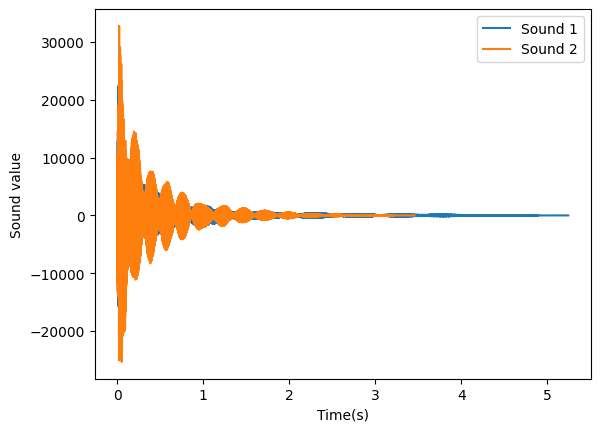

In [66]:
# Plot shifted sounds

utils.plot_sounds(sound1, sound2, sampling_freq=sampling_freq, delay=-delay)